In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [5]:
data = pd.read_csv('Jamboree_Admission.csv')
data.head()


# Serial No. (Unique row ID)
# GRE Scores (out of 340)
# TOEFL Scores (out of 120)
# University Rating (out of 5)
# Statement of Purpose and Letter of Recommendation Strength (out of 5)
# Undergraduate GPA (out of 10)
# Research Experience (either 0 or 1)
# Chance of Admit (ranging from 0 to 1)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
# structure of data

data.shape

# it contains 500 rows and 9 columns

(500, 9)

In [7]:
# data type check

data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [8]:
# missing value detection

data.isnull().sum()

# there are no null values

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [11]:
# Statistical summary
data.describe()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [12]:
data.corr() # correlation metric

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


In [13]:
# here Serial No. not shows any meaning to data, it only contains row number 
# so we can drop this feature as it will generate mis-impact in model training

data = data.drop(['Serial No.'], axis=1)

In [14]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [15]:
data.columns = [i.strip() for i in data.columns]

<Axes: xlabel='Research', ylabel='Chance of Admit'>

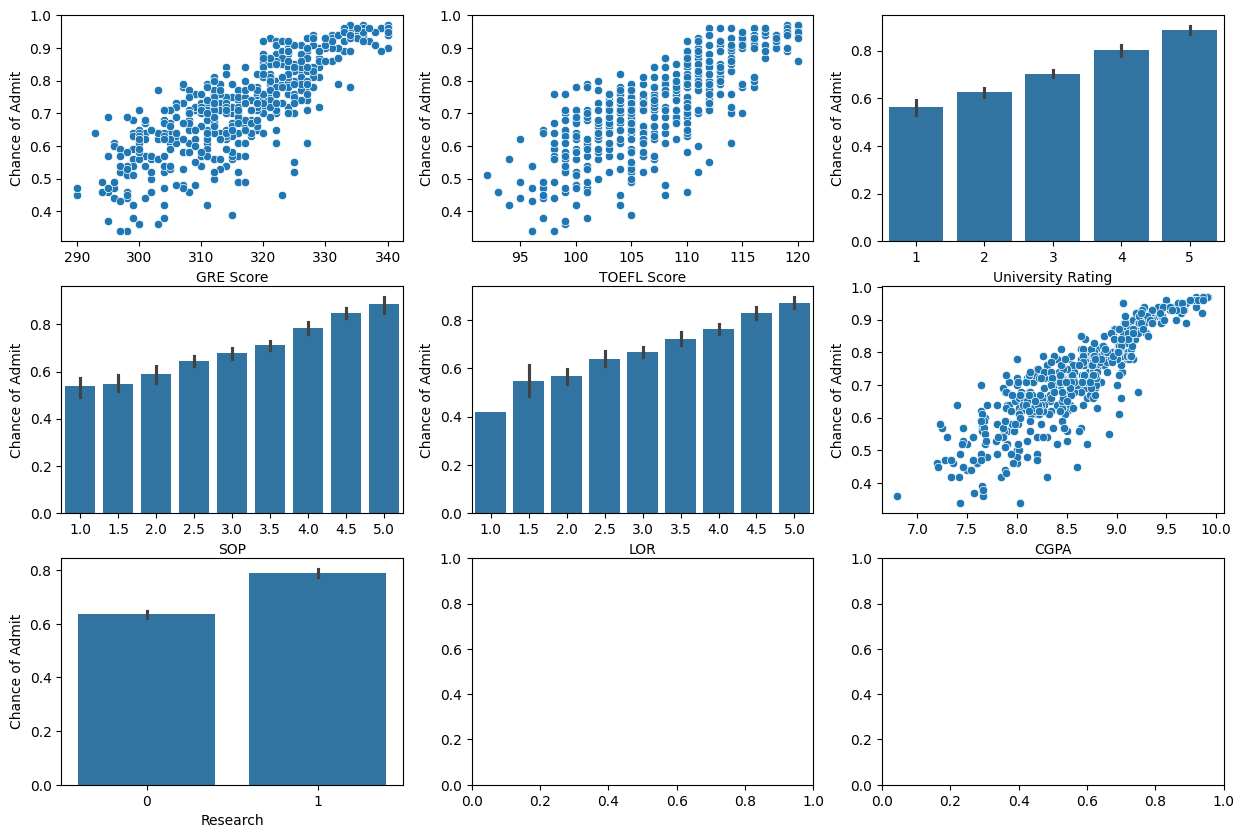

In [16]:
# GRE SCORE vs Chance of Admit

import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3,3, figsize=(15,10))

# for i in data.columns: 
sns.scatterplot(x = 'GRE Score', y='Chance of Admit', data = data, ax= axes[0][0])
sns.scatterplot(x = 'TOEFL Score', y='Chance of Admit', data = data, ax= axes[0][1])
sns.barplot(x = 'University Rating', y='Chance of Admit', data = data, ax= axes[0][2])
sns.barplot(x = 'SOP', y='Chance of Admit', data = data, ax= axes[1][0])
sns.barplot(x = 'LOR', y='Chance of Admit', data = data, ax= axes[1][1])
sns.scatterplot(x = 'CGPA', y='Chance of Admit', data = data, ax= axes[1][2])
sns.barplot(x = 'Research', y='Chance of Admit', data = data, ax= axes[2][0])


# the data are linearly increasing, which shows that the highest score - probability of getting chance of admit also increase
# research feature does not much impacting to chance of admission

In [17]:
# Scores ( GRE, TOEFL, CGPA) has high impact on Chance of Admit
# also the university rating, SOP and LOR also have a high impact on target variable
# only the research variable is not much impact on target variable

In [18]:
# features University rating, SOP and LOR are not a continous variable, so we can convert it into categorical feature


In [19]:
data[['University Rating', 'LOR', 'SOP']] =  data[['University Rating', 'LOR', 'SOP']].astype('category')

In [20]:
data['Research'] = data['Research'].astype('bool')
data.dtypes

GRE Score               int64
TOEFL Score             int64
University Rating    category
SOP                  category
LOR                  category
CGPA                  float64
Research                 bool
Chance of Admit       float64
dtype: object

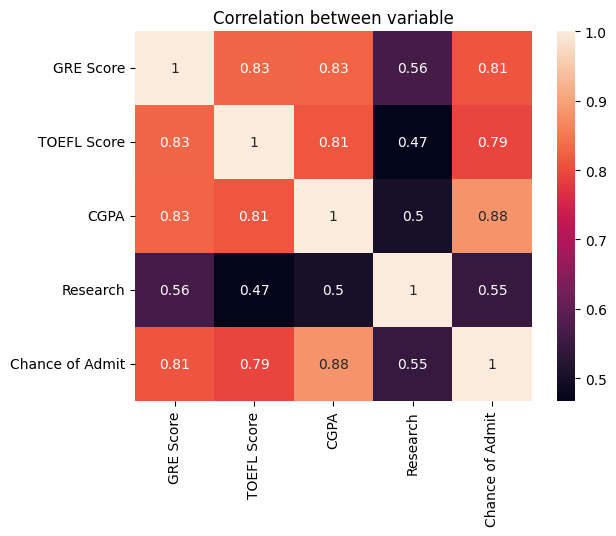

In [21]:
# univariate analysis

data_corr = data.corr(numeric_only=True)
sns.heatmap(data_corr, annot=True)
plt.title('Correlation between variable')
plt.show()

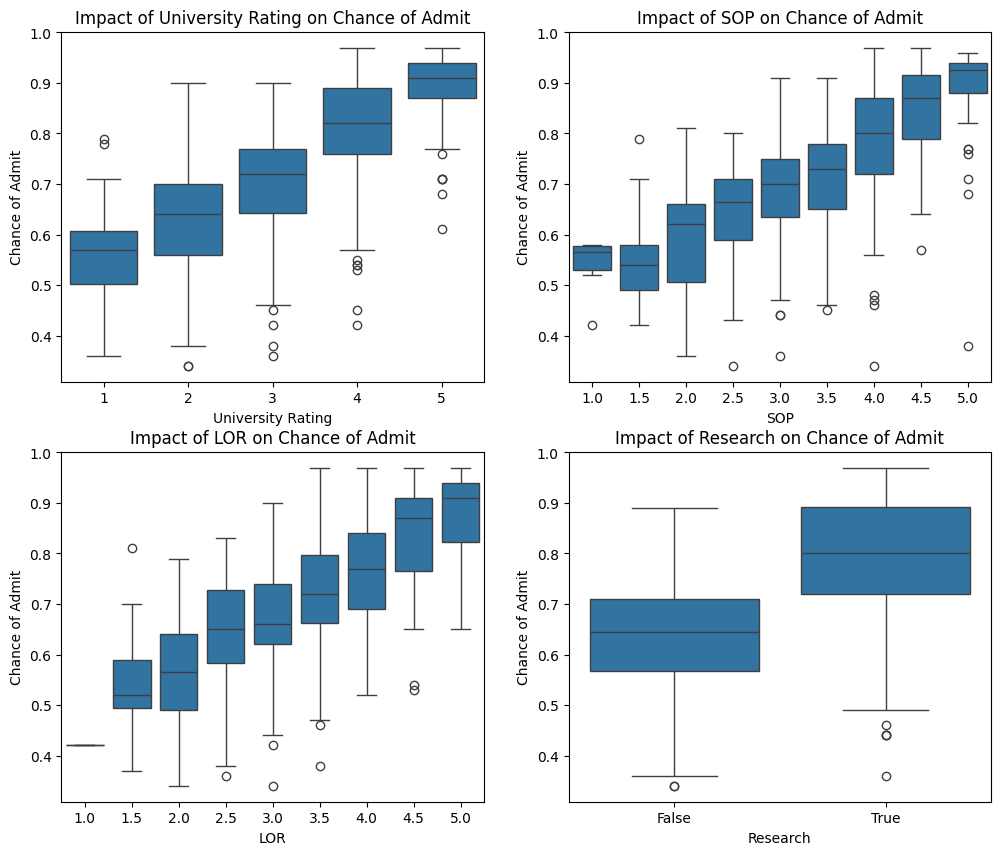

In [23]:
# categorical variable plot

cat_col = data.select_dtypes(['category', 'bool']).columns.to_list()
plt.figure(figsize=(12,10))

i = 1
for col in cat_col:
    ax = plt.subplot(2,2,i)
    sns.boxplot(x=col,y='Chance of Admit',data=data)
    plt.title('Impact of {} on {}'.format(col, 'Chance of Admit'))
    plt.xlabel(col)
    plt.ylabel('Chance of Admit')
    i+=1
# plt.tight_layout()
plt.show()

In [24]:
# features University Rating, SOP, LOR, Research also make an impact on chance of admit
# means as the value is high the chance of admit is high

In [25]:
cont_num = data.select_dtypes(['int', 'float']).columns.to_list()
cont_num

['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit']

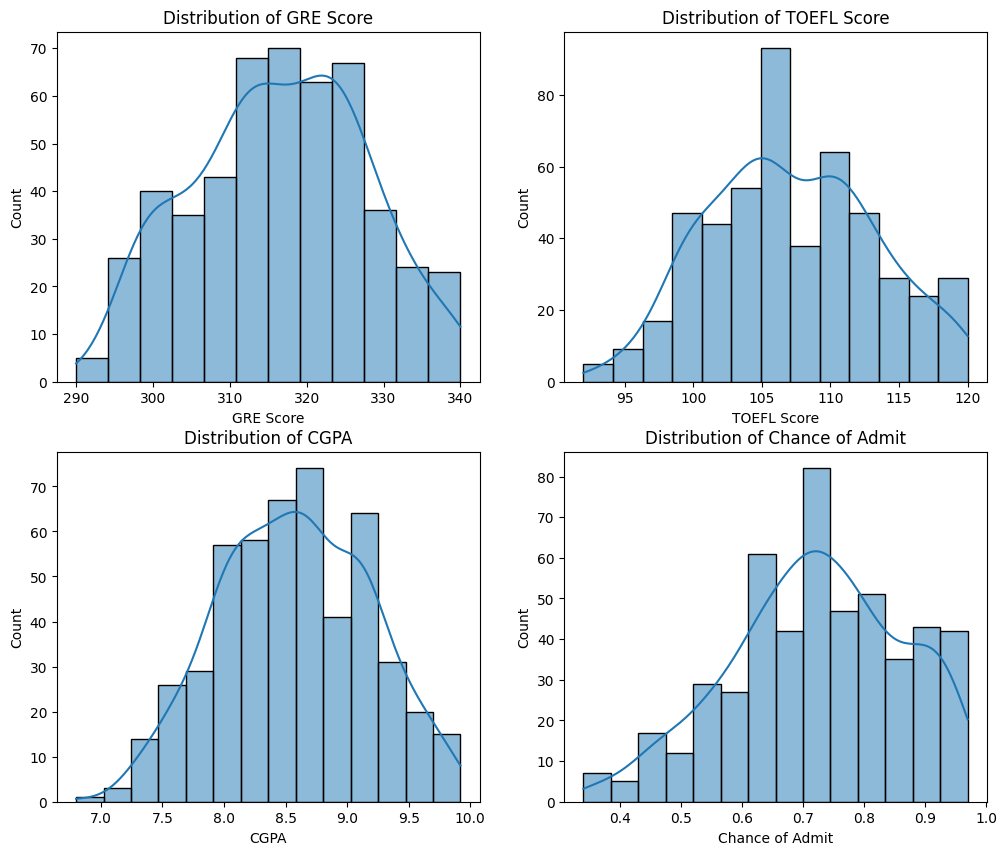

In [26]:
# distribution plot to show data normality
plt.figure(figsize=(12,10))
i = 1
for col in cont_num:
    plt.subplot(2,2,i)
    sns.histplot(x=col, data=data, kde=True)
    plt.title('Distribution of {}'.format(col))
    plt.xlabel(col)
    i+=1
plt.show()

In [27]:
# The GRE score range is from 290-340, maximum student are in the range of 310-330
# TOEFL Score ranges from 95-120, maximum student scoreing 105
# CGPA ranges from 7.0 - 10.0, with maximum students scoring around 8.5
# chance of admit ranges from 0.4-1.0, maximum chances of admit is around 70%-80%

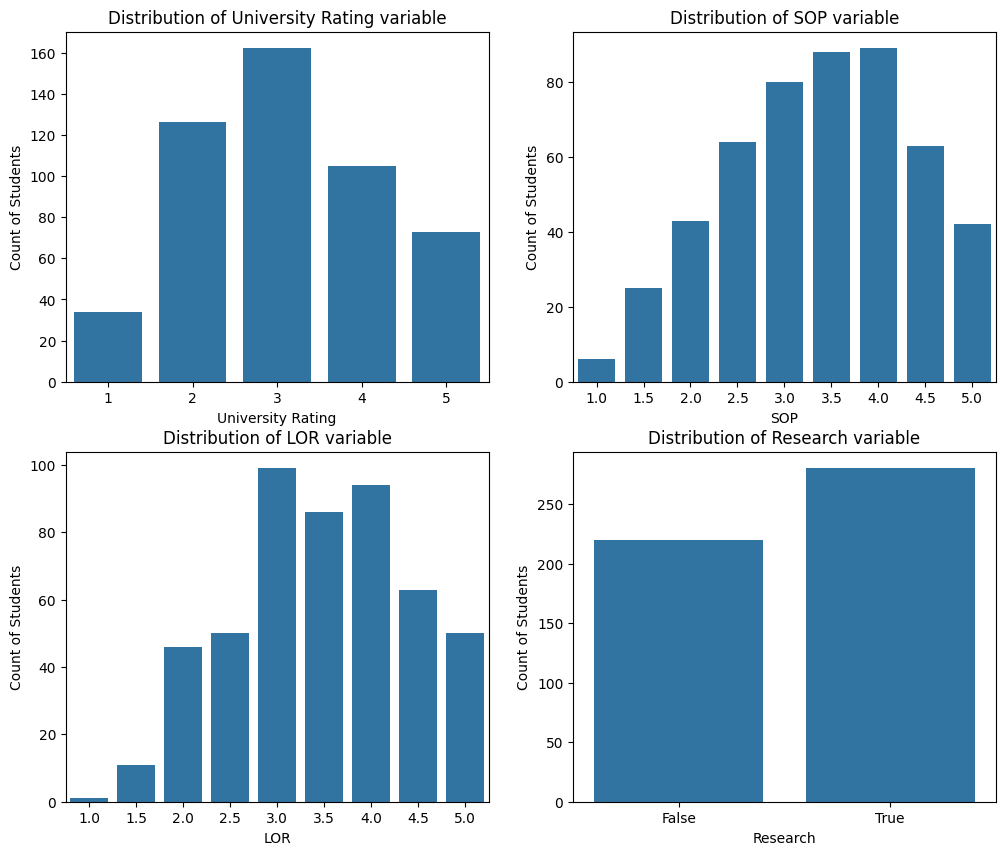

In [28]:
# count of categorical variable
i = 1
plt.figure(figsize=(12,10))
for col in cat_col:
    plt.subplot(2,2,i)
    sns.countplot(x=col, data=data)
    plt.title('Distribution of {} variable'.format(col))
    plt.xlabel(col)
    plt.ylabel('Count of Students')
    i+=1
plt.show()

In [29]:
# University Rating has a highest number of rating is 3
# highest number of students scored 3.5-4.0 SOP score
# highest number student scored 3.0 and 4.0 LOR score


In [30]:
# check for duplicate
data[data.duplicated()].count()

# there is no duplicate records

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [31]:
## Model training

# split the data into train, test

y = data['Chance of Admit']
x = data.iloc[:,:-1]


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)

In [34]:
from sklearn.preprocessing import LabelEncoder

label_encoders ={}
for col in cat_col:
    label_encoders[col] = LabelEncoder()

In [35]:
for col in cat_col:
    label_encoders[col].fit(x[col])
    

In [36]:
for col in cat_col:
    x_train[col] = label_encoders[col].transform(x_train[col])

In [37]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
197,310,106,1,5,3,8.33,0
103,317,104,1,7,6,8.47,0
231,319,106,2,5,3,8.33,1
70,332,118,4,8,8,9.64,1
412,314,102,3,3,2,7.88,1
...,...,...,...,...,...,...,...
338,323,108,4,6,6,8.74,1
225,296,99,1,3,3,8.03,0
7,308,101,1,4,6,7.90,0
76,327,112,2,4,4,8.72,1


In [38]:
for col in cat_col:
    x_test[col] = label_encoders[col].transform(x_test[col])

In [39]:
from sklearn.preprocessing import MinMaxScaler


In [40]:
# standard scaling
all_cols = x_train.columns

scaler_x = MinMaxScaler()
x_train[all_cols] = scaler_x.fit_transform(x_train[all_cols])
x_test[all_cols] = scaler_x.fit_transform(x_test[all_cols])

x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
197,0.40,0.500000,0.25,0.625,0.285714,0.490385,0.0
103,0.54,0.428571,0.25,0.875,0.714286,0.535256,0.0
231,0.58,0.500000,0.50,0.625,0.285714,0.490385,1.0
70,0.84,0.928571,1.00,1.000,1.000000,0.910256,1.0
412,0.48,0.357143,0.75,0.375,0.142857,0.346154,1.0
...,...,...,...,...,...,...,...
338,0.66,0.571429,1.00,0.750,0.714286,0.621795,1.0
225,0.12,0.250000,0.25,0.375,0.285714,0.394231,0.0
7,0.36,0.321429,0.25,0.500,0.714286,0.352564,0.0
76,0.74,0.714286,0.50,0.500,0.428571,0.615385,1.0


In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error

In [45]:
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)

LinearRegression()

In [50]:
y_pred = model_lr.predict(x_test)

In [59]:
model_lr.score(x_test, y_test)

0.7504175536828137

In [58]:
import numpy as np
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test, y_pred))

0.06891925301140087

In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = model_lr.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


MAE: 0.05
RMSE: 0.07
R²: 0.75
